<a href="https://colab.research.google.com/github/sspaulc/Coronavrius_tweet_sentiment_analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection:**

In [1]:
import pandas as pd

import numpy as np

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/Coronavirus Tweets.csv",encoding='latin')

In [5]:
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive


In [6]:
df['OriginalTweet'][3]

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

# **Hypothesis:**

1. Most tweets will be in April and March of 2020

2. Most of the Sentiment will be Positive because people will try to keep a brave face during the pandemic.

3. User Name and Screen Name have nothing to do with the tweet.

4. Most of the tweets should be from USA,UK and India,some of the most effected geographical locations.

5. The most used hashatags in the tweets will either be #COVID19 or #coronavirus.

6. Food and coronavirus should be some of the most common words as there was a food shortage in grocery stores at the time of onset.



# **1. TweetAT:**

In [7]:
import datetime
df['TweetAt'] = df['TweetAt'].apply(lambda x: datetime.datetime.strptime(x,"%d-%m-%Y"))

In [8]:
df['TweetMonth'] = df['TweetAt'].apply(lambda x: x.month)

In [9]:
df['TweetMonth'].unique()

array([3, 4])

In [10]:
df['TweetMonth']= df['TweetMonth'].map({3:'March', 4:'April'})

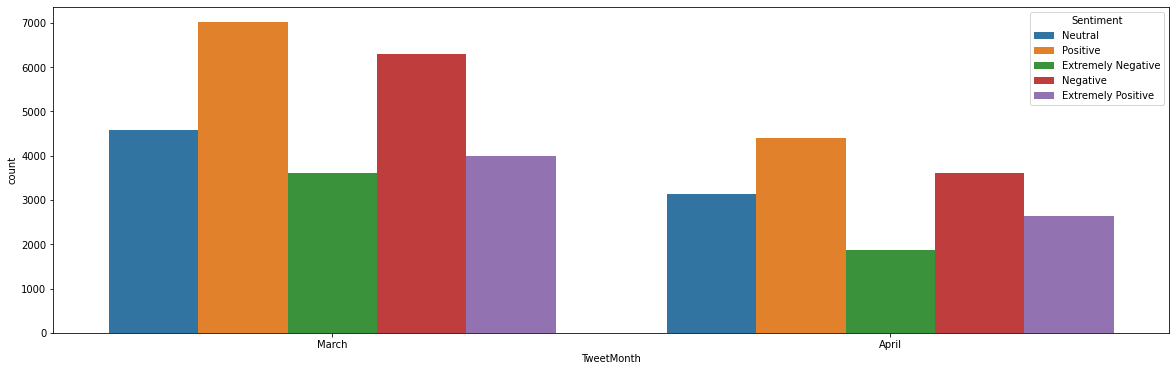

In [11]:

plt.figure(figsize=(20,6))

sns.countplot(x='TweetMonth',hue='Sentiment',data=df)

Hypothesis was correct.

# **2. Sentiment:**

In [12]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fd18e614fd0>,
 [Text(0.7077415240760712, 0.842081905219724, 'Neutral'),
  Text(-0.881725076740595, 0.657693613354115, 'Positive'),
  Text(-0.8378803993283581, -0.7127106260056401, 'Extremely Negative'),
  Text(0.24908622318422496, -1.0714271106425386, 'Negative'),
  Text(1.0051252739115888, -0.446903998353286, 'Extremely Positive')],
 [Text(0.38604083131422057, 0.45931740284712214, '27.8%'),
  Text(-0.48094095094941536, 0.3587419709204263, '24.1%'),
  Text(-0.45702567236092256, -0.3887512505485309, '18.7%'),
  Text(0.13586521264594087, -0.5844147876232028, '16.1%'),
  Text(0.5482501494063211, -0.24376581728361052, '13.3%')])

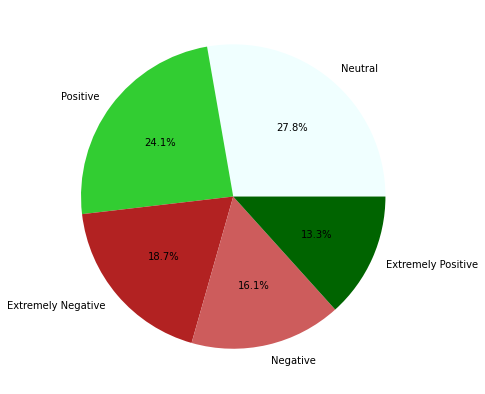

In [13]:
# Data to plot (#Final code for pie chart)
labels = df['Sentiment'].unique()
sizes = df['Sentiment'].value_counts()
colors = ['azure', 'limegreen', 'firebrick','indianred','darkgreen']

# Plot
fig = plt.figure(figsize =(10, 7))
plt.pie(sizes,labels=labels, colors=colors,autopct='%1.1f%%')

Hypothesis was correct.

# **3. User Name and Screen Name:**

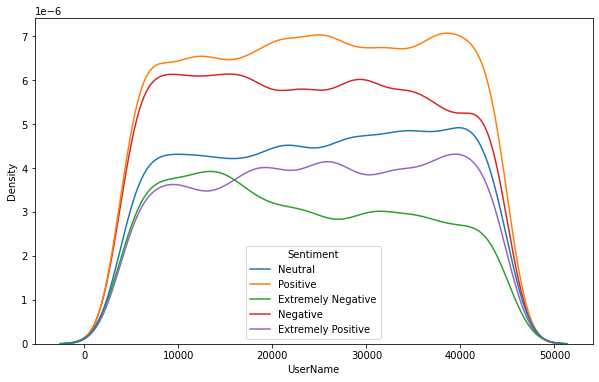

In [14]:
plt.figure(figsize=(10,6))

sns.kdeplot(x='UserName', hue='Sentiment',data=df)

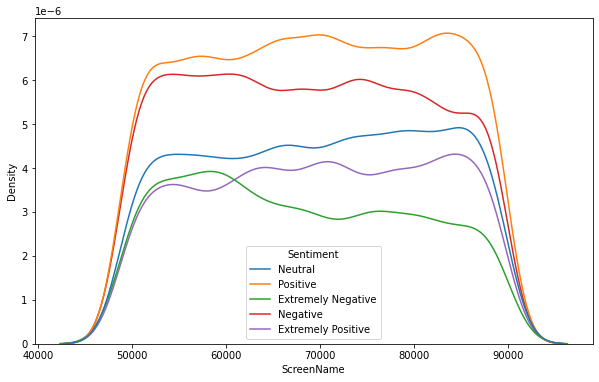

In [15]:
plt.figure(figsize=(10,6))

sns.kdeplot(x='ScreenName', hue='Sentiment',data=df)

Hypothesis was correct.

# **4. Location:**

In [16]:
df['Location']=df['Location'].fillna(df['Location'].mode())

In [17]:
df['Location'].value_counts()

London                             540
United States                      528
London, England                    520
New York, NY                       395
Washington, DC                     373
                                  ... 
Brussels / ?                         1
Face                                 1
77 Meintjies street, Sunnyside       1
Fort Lauderdale, FL, Costa Rica      1
Lancaster                            1
Name: Location, Length: 12220, dtype: int64

The dataframe isn't in a correct format. Let us correct that according to countries.

In [18]:
#Function to get location

def get_location(x):
  try:
    if 'England' in x:
      return 'UK'
    elif 'London' in x:
      return 'UK'
    elif 'NY' in x or 'DC' in x or 'CA' in x:
      return 'USA'
    elif 'China' in x:
      return 'China'
    elif 'Africa' in x:
      return 'Africa'
    elif 'India' in x or 'Mumbai' in x or 'Delhi' in x:
      return 'India'
    elif 'Canada' in x or 'Toronto' in x:
      return 'Cananda'
    elif 'Australia' in x:
      return 'Australia'
    elif 'Europe' in x or 'France' in x or 'Russia' in x:
      return 'Europe'
  except:
    return 'Global'



In [19]:
df['Countries']= df['Location'].apply(get_location)

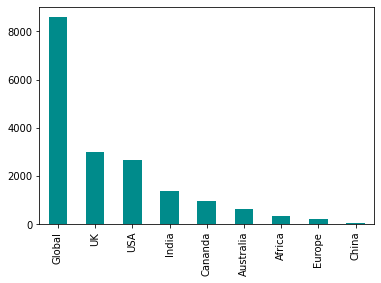

In [20]:
df['Countries'].value_counts().plot(kind='bar',color='darkcyan')

Hypothesis was correct. Besides that there are many locations that are unknown which have been identified as global.

In [21]:
df[df['Countries']=='Global'].head(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth,Countries
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,March,Global
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,March,Global
14,3813,48765,NaN,2020-03-16,ADARA Releases COVID-19 Resource Center for Tr...,Positive,March,Global
22,3821,48773,NaN,2020-03-16,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive,March,Global


I was correct.

Let us look at the most tweeted at locations.

In [22]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

In [23]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


[Text(0, 0, 'London'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Australia')]

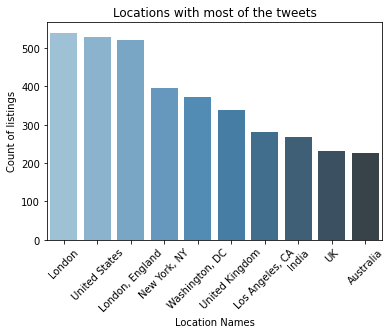

In [24]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

London, NewYork and LA are some of the most tweeted locations.

# **5. Hashtags:**

In [25]:
import re # for regular expressions

In [26]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [27]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'TweetMonth', 'Countries'],
      dtype='object')

In [28]:
hashtag=pd.Series()

In [29]:
hashtag=hashtag_extract(df['OriginalTweet'])

Converting hastag to a unnesting list

In [30]:
hashtag = sum(hashtag,[])

In [31]:
import nltk # for text manipulation

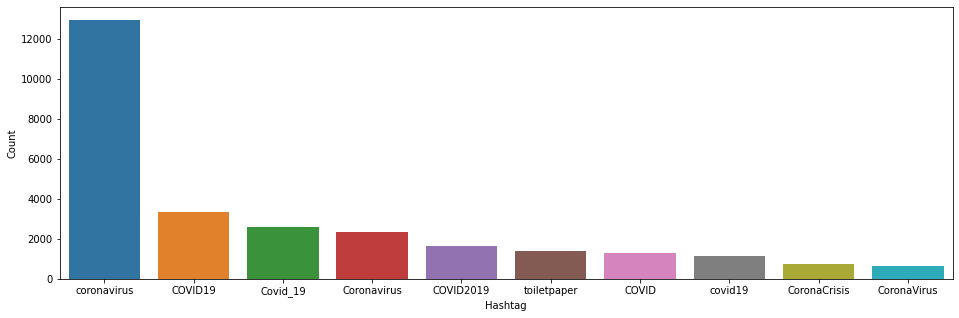

In [32]:
# making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(hashtag)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

Hypothesis was correct.

# **Text Preprocessing:**

In [33]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt



In [34]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'],'@[\w]*')

In [35]:
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth,Countries,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,March,UK,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,March,None,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,March,None,Coronavirus Australia: Woolworths to give elde...


In [36]:
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [37]:
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth,Countries,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,March,UK,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,March,None,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,March,None,Coronavirus Australia: Woolworths to give elde...


In [38]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [39]:
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth,Countries,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,March,UK,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,March,None,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,March,None,Coronavirus Australia Woolworths to give elder...


In [40]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [41]:
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth,Countries,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,March,UK,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,March,None,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,March,None,Coronavirus Australia Woolworths give elderly ...


In [42]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [43]:
#Stemming

from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [44]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

df['Tweet']  = tokenized_tweet

# **6. Food:**

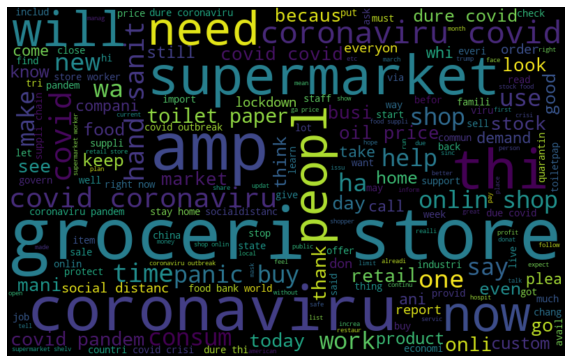

In [45]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Supermarket, grocery store,shop are some of the most common words.

Hypothesis was correct.

# **Feature selection:**

In [46]:
new_df= df[['Tweet','Sentiment']]

Removing Stop words with Vectorization:

In [47]:
feature= new_df['Tweet']

In [48]:
#TfidVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words= 'english')

X = vectorizer.fit_transform(feature)

In [49]:
X.shape

(41157, 30679)

In [50]:
#Replacing multiple unique values of target with only 3

new_df["Sentiment"]= new_df["Sentiment"].replace('Positive',3) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Positive',3) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Neutral',2) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Negative',1) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Negative',1) 

In [51]:
Y= new_df['Sentiment']

In [52]:
Y.shape

(41157,)

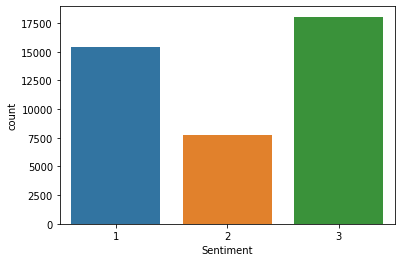

In [53]:
sns.countplot(new_df['Sentiment'])

The data needs to be oversampled.

# **SMOTE:**

In [54]:
#import library

from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()

X_smote, Y_smote = oversample.fit_resample(X, Y)

In [56]:
from sklearn.model_selection import train_test_split

# **Model Selection:**

In [57]:
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=.25, random_state=42)

1. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
from sklearn.metrics import f1_score,recall_score,classification_report

In [66]:
y_pred= lr.predict(X_test)

In [68]:
print("training recall Score : ",recall_score(y_train,lr.predict(X_train),average='macro'))
print("Validation recall Score : ",recall_score(y_test,y_pred,average='macro'))
print(classification_report(y_test,y_pred))

training recall Score :  0.8688858519344813
Validation recall Score :  0.8021657243147975
              precision    recall  f1-score   support

           1       0.82      0.74      0.78      4548
           2       0.75      0.88      0.81      4405
           3       0.84      0.78      0.81      4582

    accuracy                           0.80     13535
   macro avg       0.81      0.80      0.80     13535
weighted avg       0.81      0.80      0.80     13535

